“rút kinh nghiệm”  học lỗi sai : đó chính là gradient descent.

#**Stochastic Gradient Descent (SGD)** : học lỗi sai -> sửa mỗi lần sai (học nhanh nhưng dễ loạn)

#**Mini-Batch** : học nhóm nhỏ (ném 5 quả) học lỗi sai từ nhóm đó
#Batch : làm một lần -> mới sửa
#Batch: học xong tất cả rồi mới sửa
#Epoch: làm lại nhiều lần 1 bài (sai thì lần 2 epoch 2)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_regression
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 7.5 MB/s eta 0:00:00


In [ ]:
X,y = make_regression(n_samples = 10000 , n_features= 1, noise =20, random_state=123)

In [ ]:
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
rng = np.random.default_rng() #cái hộp bốc thăm ngẫu nhiên
idx = rng.permutation(5) #lắc 5 năm số bất kì [0,1,2,3,4]
idx


array([0, 2, 1, 4, 3])

default_rng() tạo bộ sinh số ngẫu nhiên.

permutation(5) trộn ngẫu nhiên các số 0 → 4.

idx là mảng chỉ số đã được xáo trộn, dùng để shuffle dữ liệu.

In [ ]:
X[idx], X[:5,0] #Lấy 5 hàng đầu tiên (0 → 4)
#trộn lại thứ tự các số trong X.

(array([[ 1.7116609 ],
        [-0.86522722],
        [-0.18938219],
        [ 0.97721845],
        [-1.58359034]]),
 array([ 1.7116609 , -0.18938219, -0.86522722, -1.58359034,  0.97721845]))

In [ ]:
rng

Generator(PCG64) at 0x7BD248BD75A0

**Trộn dữ liệu**

Không học theo thứ tự cũ

Giống như xáo bài trước khi học


**Chia dữ liệu thành nhiều nhóm nhỏ**

Mỗi nhóm gọi là mini-batch

Ví dụ: 100 câu học một lần


**Học từng nhóm**

Xem mình sai ở đâu

Sửa trí nhớ một chút

**Học đi học lại nhiều vòng**

Mỗi vòng gọi là epoch

Mỗi vòng máy giỏi hơn một chút

**Khi sai rất ít thì dừng**

Không cần học nữa

In [ ]:
def mini_batch_gd(X,y,epochs=1000,learning_rate = 0.1, batch_size=100,tol=1e-5): #Hàm này dạy máy học từng nhóm nhỏ dữ liệu

  rng = np.random.default_rng() #Trộn bài trước khi học, không học theo thứ tự cũ
  X = np.c_[np.ones((len(X), 1)), X] # Thêm 1 cột toàn số 1 vào trước X

  w = np.zeros(X.shape[1]) #Tạo trí nhớ ban đầu cho máy → chưa biết gì cả nên toàn số 0

  for epoch in range(epochs): # học hết toàn bộ bài 1 lần

    idx = rng.permutation(len(y)) #Trộn thứ tự dữ liệu
    Xs,ys = X[idx], y[idx]

    for i in range(0,len(y),batch_size):#Chia dữ liệu thành từng nhóm nhỏ (mini-batch)
      X_batch, y_batch = Xs[i:i+batch_size], ys[i:i+batch_size]  # Lấy một nắm dữ liệu nhỏ để học

      grad = -(1/len(y_batch))*(X_batch.T @ (y_batch-X_batch @ w)) #“Mình đang sai theo hướng nào và sai bao nhiêu
      w -=learning_rate * grad #Máy sửa trí nhớ của mình một chút

    if np.linalg.norm(grad) < tol: #khi nào dừng -> sai rất nhỏ
      break
  return w

In [ ]:
print(mini_batch_gd(X,y))
#size increase closer

[ 0.11276175 91.30556907]


y≈0.11+91.3×x

In [ ]:
import pingouin as pg
pg.linear_regression(X_scaled,y)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,1.021354,0.201784,5.061628,4.230923e-07,0.953086,0.953081,0.625817,1.416891
1,x1,90.940104,0.201784,450.681078,0.000000e+00,0.953086,0.953081,90.544567,91.335640


| Thành phần | Mini-Batch GD | Pingouin (chuẩn) |
| ---------- | ------------- | ---------------- |
| Bias       | ~0.11         | ~1.02            |
| Hệ số x    | ~91.31        | ~90.94           |


pingouin là một thư viện Python dùng để làm thống kê và hồi quy một cách “chuẩn sách giáo khoa”.

Viết code cho máy học bằng mini-batch gradient descent →
dùng pingouin để đối chứng trên data nhỏ →
nếu kết quả khớp → dùng model đó cho data lớn / data khác.

#Advantages of Gradient Descent


- Large data
- Model phức tạp
- Tiết kiệm bộ nhớ
- Linh hoạt , dùng chung nhiều bài toán



In [ ]:
#Entropy suprised and get information
#High propalbility low information  (duma ko ngo se hoc)

| Khái niệm    | Ý nghĩa                      |
| ------------ | ---------------------------- |
| Surprise     | Một sự kiện hiếm thì bất ngờ |
| Uncertainty  | Mức độ không biết            |
| Entropy      | Trung bình mức bất ngờ       |
| High Entropy | Khó đoán                     |
| Low Entropy  | Dễ đoán                      |


**Entropy**= mức độ không chắc chắn (uncertainty) của một phân phối xác suất.
cao -> khó đoán  = Uncertainty

**Suprise** = 1/ Probalbility

#Tại sao phải log
- vì xác suất nhỏ thường bất ngờ => 1/P
- Bất ngờ = log(P) -> gọn hơn

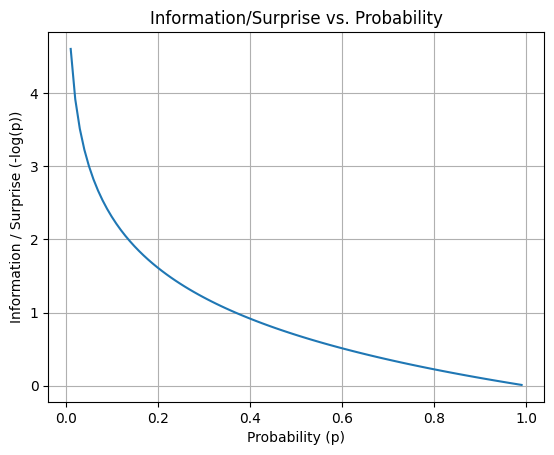

In [ ]:
prob = np.linspace(0.01, 0.99, 100) # Define a sample 'prob' array
plt.plot(prob,np.log(1/prob))
plt.xlabel('Probability (p)')
plt.ylabel('Information / Surprise (-log(p))')
plt.title('Information/Surprise vs. Probability')
plt.grid(True)
plt.show()

In [ ]:
np.log(1/prob).min(),np.log(1/prob).max()

(np.float64(0.010050335853501506), np.float64(4.605170185988092))

WHY LOG TRANSFORMATION?

In [ ]:
#cross entropy penalty of data